# Week 6 Studio

In this week's studio we're going to do lots and lots of t-tests.  It's all plug and chug, the only nuance is deciding how we calculate our p-value based on our alternative hypothesis.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

### Two-Tailed t-Test

In this section we will explore the two-tailed t-test.  The two-tailed test will evaluate if the mean is different than a hypothetical value.

A t-test is performed when we don't know the population standard deviation.  

#### Central Limit Theorem

The central limit theorem is the foundation of hypothesis testing.  We know that the sample means are normally distributed and that the spread of the sample mean distribution is determined by the standard error.  We can calculate our $t$ statistic using the sample mean, a hypothetical population mean, and the standard error of the mean.  Then we can evaluate the cumulative probability of getting that sample if the hypothetical value is true.  This cumulative probability is called a *p-value* and it will tell us the likelihood that our hypothesis was correct.

#### p-value Visualization

Before we begin our analysis, we'll make a quick function that will help us visualize the p-value.  We simply take the code from our exploration of cumulative probability distribution and package it in a function which takes the t-value as an input.

In [2]:
def t_cdf_two_tailed(t,nu):
    # make the figure 
    plt.figure(figsize=(10,6))
    
    # get right and left t
    t = abs(t)
    t_right = t
    t_left = -t

    # outcome space
    x = np.linspace(-5,5,num=101)

    # probability distribution
    f = st.t.pdf(x,nu)
    plt.plot(x,f)

    # fill in cummulative region
    plt.fill_between(x,f,color="C0",alpha=0.2)

    # plot the left side
    x_left = np.linspace(-5,t_left,num=101)
    f_left= st.t.pdf(x_left,nu)
    plt.fill_between(x_left,f_left,color="red")

    # plot the right side
    x_right = np.linspace(t_right,5,num=101)
    f_right = st.t.pdf(x_right,nu)
    plt.fill_between(x_right,f_right,color="red")

    # format plot
    plt.xlabel("Outcome",fontsize=18)
    plt.ylim(0,1)
    plt.show()

Now we can test our visualization.

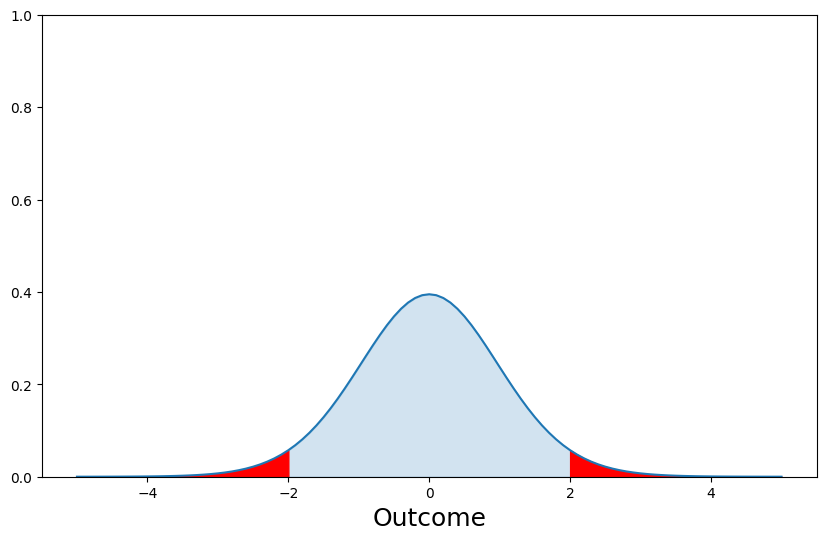

In [3]:
t = 2
nu = 25

t_cdf_two_tailed(t,nu)

## Two-Tailed Test

What happens if we want to test whether the population mean is higher than our null hypothesis?  In that case we use a right-tailed test.  We simply calculate the cumulative probability of landing at or above our t value.

Suppose we work for a chemical company on the filling process.  We are testing some new equipment so we don't have a great estimate for the mean, but we have some documentation from the manufacturer which tells us the standard deviation. Our goal is to get 500 grams of chemical into each container.  We know that the standard deviation is 5 grams.  We take 10 measurements and we would like to know if our population mean is less than 500 grams.

First we set up our null hypthesis.
$$\Large H_0: \mu=500g$$

The null hypothesis is the default assumption.  If our data contradicts this assumption then we reject this default hypthesis in favor of the alternative hypothesis.  In this case the alternative hypothesis is:

$$ \Large H_a: \mu \neq 500g$$

Now that we have our null and alternative hypothesis, we can follow some basic steps to test and see if it is likely that our null hypothesis is correct.

1. Calculate sample mean
2. Calculate t-value using the sample mean, the standard error of the mean (using sample standard deviation), and the population mean proposed by the null hypthesis.
3. Calculate the cumulative probability above that t-value or below the negative t-value.  This will tell us the likelihood of getting a result at least as extreme as our sample if the null hypthesis was true.
4. Compare this cumulative probability to our required level of significance.

Basically, the p-value is going to tell us how likely it is that the null hypothesis is true based on the sample. 

For the t-statistic in step (2), we use the form which describes the sample distirbution.

$$\Large t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

We'll use the same samples as before so we can see that we get the opposite results (except in the last case).

When we calculate the cumulative probability we have a couple options.  We know that we are distributing $\alpha$ on both sides, so we need to not only check the t-value that we actually calculate, but also the t-value that is just as extreme on the other side.  

Since the distribution is symmetrical we have a few options for how we actually perform the calculation.

1. Calculate both high and low values of t, evaluate the CDF for both values and then add them together.  Compare to $\alpha$.

2. Only check the low side.  We can do this by taking the absolute value of the t-value that we calculate and then multiplying by -1.  Then we calculate the CDF up to that value and compare to $\alpha/2$.

3. Only check the high side.  We can do this by taking the absolute value of the t-value that we calculate.  Then we calculate the CDF above that value and compare to $\alpha/2$.

4. Calculate the value on the low side as in (2) but then multiply the p-value by 2 since we know there will be an equal amount on the high side.  Then we compare to $\alpha$

There is no new syntax in this process.  Refer to previous studio notebooks for syntax.

First write a function which accepts a list of numbers and an estimate for the population mean and returns the p-value, t-statistic, and degrees of freedom.

In [4]:
def two_tailed_t_test(sample, mu_0):

    x_bar = np.mean(sample)
    
    s = np.std(sample, ddof=1)
    
    nu = len(sample) - 1
    
    t = (x_bar - mu_0) / (s / np.sqrt(len(sample)))
    
    p = 2 * (1 - st.t.cdf(abs(t), df=nu))
    
    print("The p-value is: {}".format(p))
    
    return t, p, nu

### Low Sample

Next let's test the function on a sample.

In [5]:
sample = [487, 495, 482, 474, 489, 499, 492, 485, 483, 497]

Almost all of our measurments are less than 500, so intuitively we know that it is unlikely to get 10 measurements in a row that are less than the mean.  Still we want to quantify our results.

Now we will calculate the cummulative probabilty of landing on or above this t-value on the high side ***or*** on or below this value on the low side. 

Fortunately the t-distibution is symmetrical, so we can simply check the absolute value against the high side.  However we have to remember that our significance level is split between the two tails.  If we chose option 2 or 3 above for then we will reject the null hypthesis is our p-value is less than or equal to half of our level of significance, $\alpha/2$.  If we chose option 1 or 4 then we compare to $\alpha$.

In [6]:
t,p,nu = two_tailed_t_test(sample,500)

The p-value is: 0.0009699079036229463


This is a fairly low probability so we reject the null hypthesis in favor of the alternative hypthesis.  Let's look at the distribution.

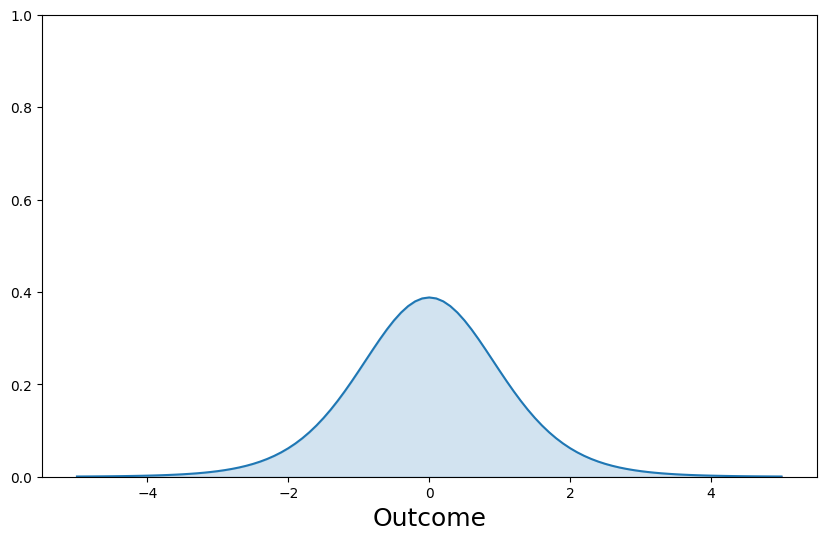

In [7]:
t_cdf_two_tailed(t,nu)

#### High Sample

Now let's look and see what happens when we have a sample which is above the value of our null hypthesis.

In [8]:
sample = [504, 510, 502, 495, 513, 527, 503, 504, 519, 521]

Almost all of our measurments are greater than 500, so intuitively we know that it is unlikely to get 10 measurements in a row that are greater than the mean.  


Now we will calculate the cummulative probabilty of landing on or above this t-value, or on or below the negative t-value.

In [9]:
t,p,nu = two_tailed_t_test(sample,500)

The p-value is: 0.01308415979069455


This is a low probability so we can reject $H_0$ in favor of $H_a$, that the mean is not equal to 500g.

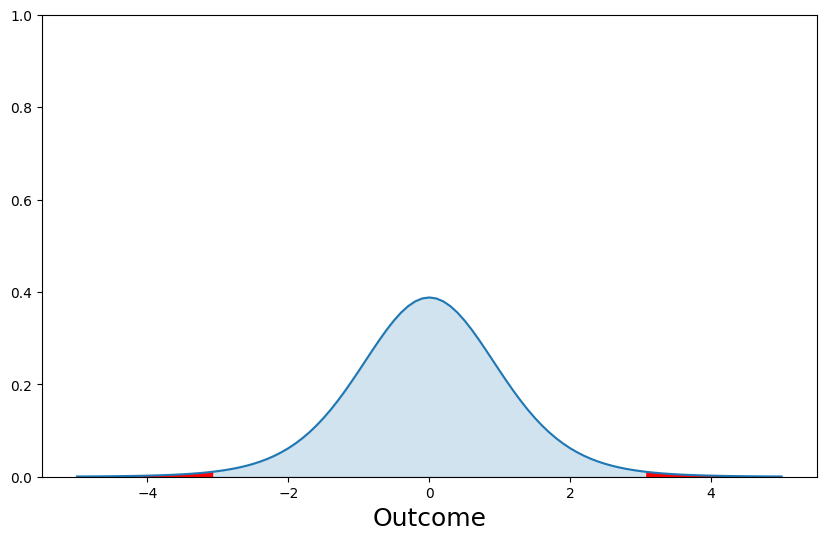

In [10]:
t_cdf_two_tailed(t,nu)

#### Ambiguous Sample #1

Now let's look at some more ambiguous samples.

In [11]:
sample = [487, 495, 503, 482, 519, 474, 489, 499, 504, 521]

In this case it is not as obvious because we have some values above and below the null hypothesis.  Let's run the same test and see what our p-value is.

Now we will calculate the cummulative probabilty of landing on or above this t-value, or on or below the negative t-value.

In [12]:
t,p,nu = two_tailed_t_test(sample,500)


The p-value is: 0.5872001647457199


This p-value indicates that there is a 28.4% chance of getting this particular sample if the null hypothesis is true. 

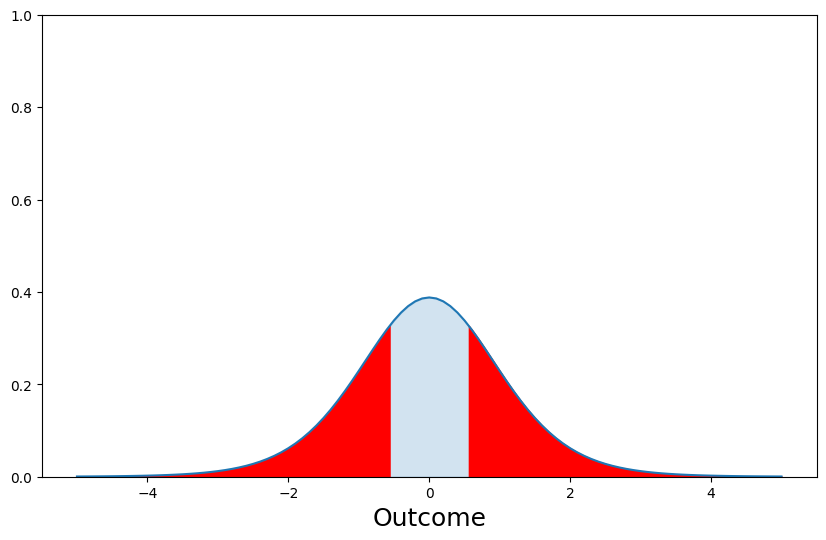

In [13]:
t_cdf_two_tailed(t,nu)

#### Ambiguous Sample #2

Let's look at a sample with a few more "high" values.

In [14]:
sample = [497, 495, 500, 482, 499, 474, 499, 499, 500, 489]

Now we will calculate the cummulative probabilty of landing on or above this t-value, or on or below the negative t-value.

In [15]:
t,p,nu = two_tailed_t_test(sample,500)


The p-value is: 0.04477842580717817


Now the p-value is saying that there is a 4.2% chance that we got this particular sample assuming that the null hypthesis is true.  However since our region of significance is split between two tails, we need a p-value of less than $\alpha/2$ to reject the null hypothesis.  If $\alpha=0.05$ for a 95% confident rejection, we cannot reject the null hypothesis.

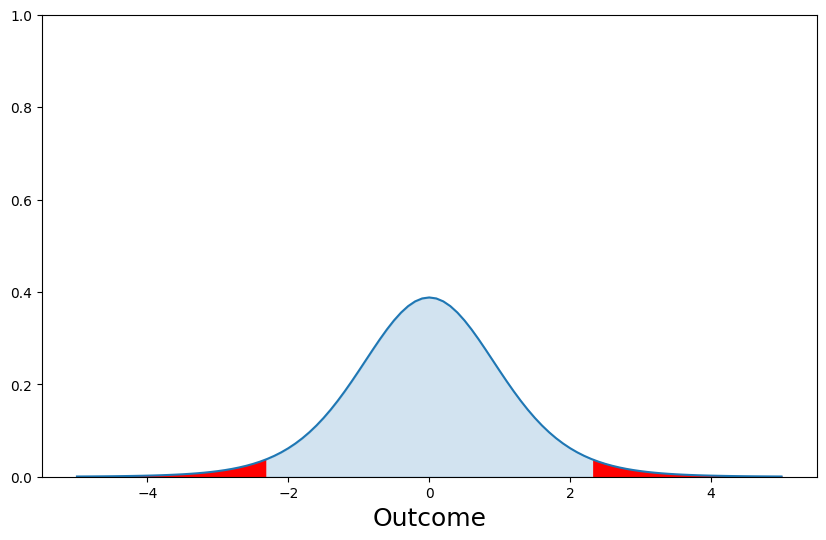

In [16]:
t_cdf_two_tailed(t,nu)

# Two Sample t-Test for Population means (Left-tail)

Up to this point we have only compared a single sample to some hypothetical population.  However when running experiments we will often want to directly compare two samples rather than comparing them each to a hypothetcal value for $\mu$.  We won't know the population statistics so we have to use a t-test.

For a basic left-tailed t-test to see if the population means are different, our hypothesis will have this form.

$$ \Large H_0: \mu_1 = \mu_2$$

$$ \Large H_a: \mu_1 < \mu_2 $$

We will perform a left-tailed test to determine if there is sufficient evidence to conclude that the mean of poulation #1 is less than the mean of population #2.

Our t-statistic will be calculated as:

$$\Large t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$

and our t-distribution will have degree of freedom of

$$\Large \nu = n_1 + n_2 -2 $$

Once we have our t-statistic, we calculate our p-value exactly as we would with a single sample t-test, by evaluating the cummulative probability of getting a result at least that extreme.

Let's consider our filling process again.  Although this time, instead of proposing a hypothetical value for the population mean we will simply compare two samples.

We will compare a function based on the equations above to the built in method in **scipy.stats**.

First let's write our own function to compare two samples.  We know longer need to input a hypothetical value for $\mu$.  We're simply testing to see if it's likely that $\mu_1$ is less than $\mu_2$.

In [17]:
def two_sample_t_test_left(sample_1, sample_2):
    
    x1_bar = np.mean(sample_1)
    x2_bar = np.mean(sample_2)
    
    s1 = np.std(sample_1, ddof=1)
    s2 = np.std(sample_2, ddof=1)
    
    n1 = len(sample_1)
    n2 = len(sample_2)
    
    t = (x1_bar - x2_bar) / np.sqrt((s1**2 / n1) + (s2**2 / n2))
    
    nu = n1 + n2 - 2
    
    p = st.t.cdf(t, df=nu)
    
    print("p-value: {}".format(p))
    
    return t, p

We'll consider four samples from our fill process.

In [18]:
sample_1 = [487, 495, 482, 474, 489, 499, 492, 485, 483, 497]

sample_2 = [504, 510, 502, 495, 513, 527, 503, 504, 519, 521]

sample_3 = [504, 489, 502, 495, 513, 507, 503, 475, 510, 492]

sample_4 = [513, 495, 503, 497, 500, 494, 501, 499, 504, 511]

First we'll calculate the p-value using our custom function.

p-value: 0.7395693253906359


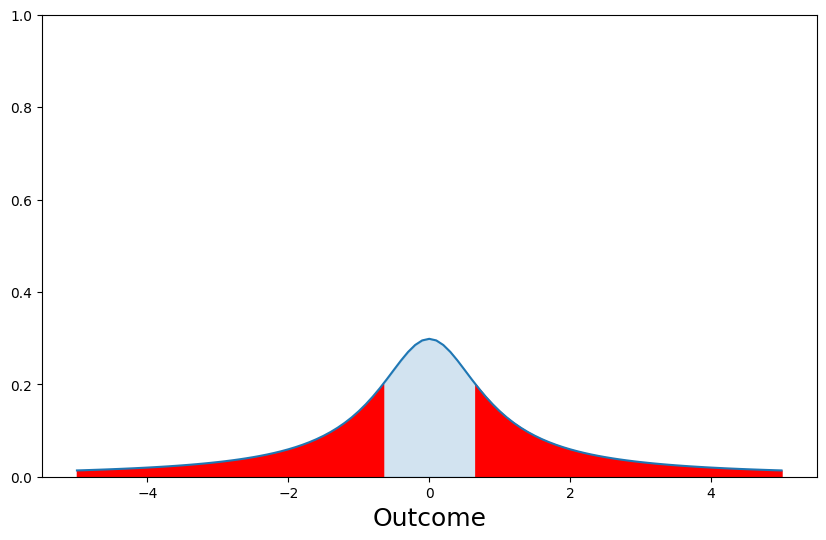

In [19]:
t,p = two_sample_t_test_left(sample_4,sample_3)

t_cdf_two_tailed(t, p)

We can simply change the input values to the functions to compare the samples.

# Two Sample t-Test for Population means (Right-tail)

When running experiments we will often want to directly compare two samples rather than comparing them each to a hypothetcal value for $\mu$.  We won't know the population statistics so we have to use a t-test.

For a basic right-tailed t-test to see if the population means are different, our hypothesis will have this form.

$$ \Large H_0: \mu_1 = \mu_2$$

$$ \Large H_a: \mu_1 > \mu_2 $$

We will perform a right-tailed test to determine if there is sufficient evidence to conclude that the mean of population #1 is greater than the mean of population #2.

Our t-statistic will be calculated as:

$$\Large t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$

and our t-distribution will have degree of freedom of

$$\Large \nu = n_1 + n_2 -2 $$

Once we have our t-statistic, we calculate our p-value exactly as we would with a single sample t-test, by evaluating the cummulative probability of getting a result at least that extreme.

Let's consider our filling process again.  Although this time, instead of proposing a hypothetical value for the population mean we will simply compare two samples.

First let's write our own function to compare two samples.

In [20]:
def two_sample_t_test_right(sample_1, sample_2):
    
    x1_bar = np.mean(sample_1)
    x2_bar = np.mean(sample_2)
    
    s1 = np.std(sample_1, ddof=1)
    s2 = np.std(sample_2, ddof=1)
    
    n1 = len(sample_1)
    n2 = len(sample_2)
    
    t = (x1_bar - x2_bar) / np.sqrt((s1**2 / n1) + (s2**2 / n2))
    
    nu = n1 + n2 - 2
    
    p = 1 - st.t.cdf(t, df=nu)
    
    print("p-value: {}".format(p))
    
    return t, p

We'll consider four samples from our fill process.

In [21]:
sample_1 = [487, 495, 482, 474, 489, 499, 492, 485, 483, 497]

sample_2 = [504, 510, 502, 495, 513, 527, 503, 504, 519, 521]

sample_3 = [504, 489, 502, 495, 513, 507, 503, 475, 510, 492]

sample_4 = [513, 495, 503, 497, 500, 494, 501, 499, 504, 511]

First we'll calculate the p-value using our custom function.

p-value: 2.1074464267356596e-05


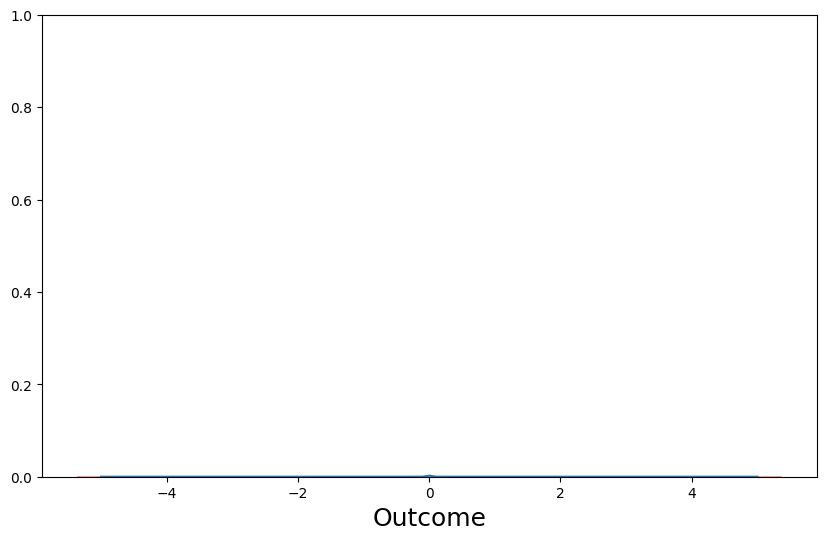

In [22]:
t,p = two_sample_t_test_right(sample_2,sample_1)
t_cdf_two_tailed(t, p)

# Two Sample t-Test for Population means (Two-tail)

When running experiments we will often want to directly compare two samples rather than comparing them each to a hypothetcal value for $\mu$.  We won't know the population statistics so we have to use a t-test.

For a basic test to see if the means are different, our hypothesis will have this form.

$$ \Large H_0: \mu_1 = \mu_2$$

$$ \Large H_a: \mu_1 \neq \mu_2 $$

We will perform a two-tailed test to determine if there is sufficient evidence to conclude that the samples come from populations with different means.

Our t-statistic will be calculated as:

$$\Large t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$

and our t-distribution will have degree of freedom of

$$\Large \nu = n_1 + n_2 -2 $$

Once we have our t-statistic, we calculate our p-value exactly as we would with a single sample t-test, by evaluating the cummulative probability of getting a result at least that extreme.

Let's consider our filling process again.  Although this time, instead of proposing a hypothetical value for the population mean we will simply compare two samples.

When we calculate the cumulative probability we have a couple options.  We know that we are distributing $\alpha$ on both sides, so we need to not only check the t-value that we actually calculate, but also the t-value that is just as extreme on the other side.  

Since the distribution is symmetrical we have a few options for how we actually perform the calculation.

1. Calculate both high and low values of t, evaluate the CDF for both values and then add them together.  Compare to $\alpha$.

2. Only check the low side.  We can do this by taking the absolute value of the t-value that we calculate and then multiplying by -1.  Then we calculate the CDF up to that value and compare to $\alpha/2$.

3. Only check the high side.  We can do this by taking the absolute value of the t-value that we calculate.  Then we calculate the CDF above that value and compare to $\alpha/2$.

4. Calculate the value on the low side as in (2) but then multiply the p-value by 2 since we know there will be an equal amount on the high side.  Then we compare to $\alpha$

In [23]:
def two_sample_t_test(sample_1, sample_2):
   
    x1_bar = np.mean(sample_1)
    x2_bar = np.mean(sample_2)
    
    s1 = np.std(sample_1, ddof=1)
    s2 = np.std(sample_2, ddof=1)
    
    n1 = len(sample_1)
    n2 = len(sample_2)
    
    t = (x1_bar - x2_bar) / np.sqrt((s1**2 / n1) + (s2**2 / n2))
    
    nu = n1 + n2 - 2
    
    p = 2 * (1 - st.t.cdf(abs(t), df=nu))
    
    print("p-value: {}".format(p))
    
    return t, p

Instead of using the same old lists, let's make some new data that's easy to manipulate.  

In [24]:
mu_1 = 25
sigma_1 = 3
sample_1 = sigma_1*np.random.randn(5) + mu_1

mu_2 = 20
sigma_2 = 4
sample_2 = sigma_2*np.random.randn(5) + mu_2

print(sample_1)
print(sample_2)

[28.1250036  25.17182632 23.08167912 23.80249537 21.04270266]
[20.54679376 23.70507357 15.10994946 16.72439078 23.67087447]


Now apply the two sample, two-tailed test.  Experiment with values for both $\sigma$'s and both $\mu$'s until you understand how the influence the outcome.  What happens as the $\sigma$'s get learger or smaller?  Does that make sense?  How about if the $\mu$'s get closer togther or farther apart?  

In [25]:
t,p = two_sample_t_test(sample_1,sample_2)

p-value: 0.07738521987756397


# Penguins!

Now that you're acquainted with two sample tests you should apply them to the penguin data set.  You already know how to isolate species and get samples from the DataFrame.  Perform at least 3 two-sample tests on different factors.  Use only 5 measurements from each species as a sample.  Here are some suggestions

1. Show that the mass of one species is different than another species.  How will you write your hypotheses?
2. Show that the culmen length of one species is less than another. How will you write your hypotheses?
3. Show that the flipper length of one species is greater than another. How will you write your hypotheses?

Run each test several times to gain some intution about how the sample influences the outcome.  Document your process with markdown cells.

If you're feeling rowdy, show that there is a difference in body mass between Males and Females within one species. How will you isolate the data?

In [26]:
import os
path = os.path.dirname('__file__')
csv_file = os.path.join(path, 'penguins_size.csv')

penguins = pd.read_csv(csv_file)

# Example: Compare body mass between two species
species_1 = penguins[penguins['species'] == 'Adelie']['body_mass_g'].dropna().sample(5)
species_2 = penguins[penguins['species'] == 'Chinstrap']['body_mass_g'].dropna().sample(5)

t, p = two_sample_t_test(species_1, species_2)
print("Two-tailed test for body mass between Adelie and Chinstrap penguins:")
print("t-statistic: {:.3f}, p-value: {:.3f}".format(t, p))

p-value: 0.1733011364206074
Two-tailed test for body mass between Adelie and Chinstrap penguins:
t-statistic: -1.495, p-value: 0.173
